#Measurement of fitting time and query time

In this notebook different parameters and their influence to the fitting and query time of sklearn, lsh forest and minHash are examinded.

Import every needed dependency

In [3]:
%matplotlib inline
import time
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_sparse_uncorrelated
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import LSHForest
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
import neighborsMinHash as kneighbors
from neighborsMinHash.util import create_dataset
from neighborsMinHash.util import create_dataset_fixed_nonzero
from neighborsMinHash.util import measure_performance


import random

from scipy.sparse import dok_matrix
from scipy.sparse import rand
from scipy.sparse import vstack


import pyflann
import annoy

In [4]:
def plotData( data, color, label, title, xticks, ylabel,
             number_of_instances, number_of_features,
             figure_size=(10,5),  bar_width=0.1,log=True):
    plt.figure(figsize=figure_size)
    N = number_of_instances * number_of_features

    ind = np.arange(N)    # the x locations for the groups
    
    #"r", "b", "g", "c", "m", "y", "k", "w"
    count = 0
    for d, c, l in zip(data, color, label):
        plt.bar(ind + count * bar_width , d,   bar_width, color=c, label=l)
        count += 1
    if log:
        plt.yscale('log')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(ind+3*bar_width, (xticks))
    plt.legend(loc='upper left', fontsize='small')
    plt.grid(True)
    plt.show()

Measure the fitting time, query time and the accuracy of sklearn, lshf and minHash for the following parameters:
- seed = 6
- centroids = 8
- size_of_datasets = 7
- number_of_instances = [1000, 10000]
- number_of_features = [1000, 10000]
- density = 0.01
- fraction_of_density = 0.2
- n_neighbors_sklearn = 5
- n_neighbors_minHash = 5

In [8]:
seed = 6
centroids = 8
size_of_datasets = 7
number_of_instances = [1000, 10000]
number_of_features = [1000, 10000]
density = 0.01
fraction_of_density = 0.2
n_neighbors_sklearn = 5
n_neighbors_minHash = 5
dataset_array = []
for instances in number_of_instances:
    for features in number_of_features:
        dataset, y = create_dataset(seed=seed, number_of_centroids=centroids, number_of_instances=instances,
                                         number_of_features=features,density = density,
                                         fraction_of_density=fraction_of_density, size_of_dataset = size_of_datasets)
        dataset_array.append(dataset)

returnValues = measure_performance(dataset_array, n_neighbors_sklearn, n_neighbors_minHash)

xticks = []
for i in number_of_instances:
    for j in number_of_features:
        tick = str(i)
        tick += "/"
        tick += str(j)
        xticks.append(tick)
# data, color, label, title, xticks, ylabel, number_of_instances, number_of_features,figure_size=(10,5),  bar_width=0.1,log=True
# plot query time for 50 times one query


Dataset processing:  1 / 4
Fitting of sklearn_nneighbors done!
Fitting of minHash_nneighbors done!
Fitting of LSHF done!
Fitting of annoy done!
Computation of sklearn_nneighbors done!
Computation of minHash_slow done!
Computation of minHash_fast done!
Computation of lshf done!
Computation_2 of sklearn_nneighbors done!
Computation_2 of minHash_slow done!
Computation_2 of minHash_fast done!
Computation_2 of lshf done!
Computation_2 of annoy done!
Dataset processing:  2 / 4
Fitting of sklearn_nneighbors done!
Fitting of minHash_nneighbors done!
Fitting of LSHF done!
Fitting of annoy done!
Computation of sklearn_nneighbors done!
Computation of minHash_slow done!
Computation of minHash_fast done!
Computation of lshf done!
Computation_2 of sklearn_nneighbors done!
Computation_2 of minHash_slow done!
Computation_2 of minHash_fast done!
Computation_2 of lshf done!
Computation_2 of annoy done!
Dataset processing:  3 / 4
Fitting of sklearn_nneighbors done!
Fitting of minHash_nneighbors done!
Fit

####Query time for x queries in one query

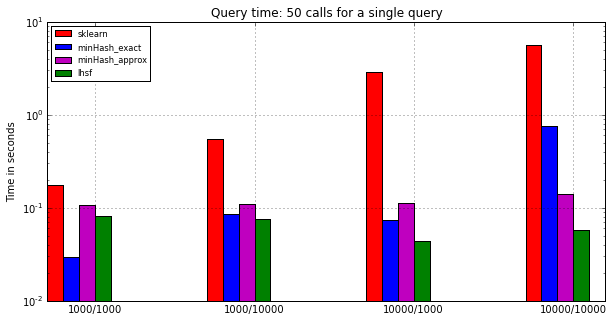

In [9]:
plotData(data=returnValues[3:7], color=["r", "b", "m", "g"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Query time: 50 calls for a single query')

####Query time for one time x queries

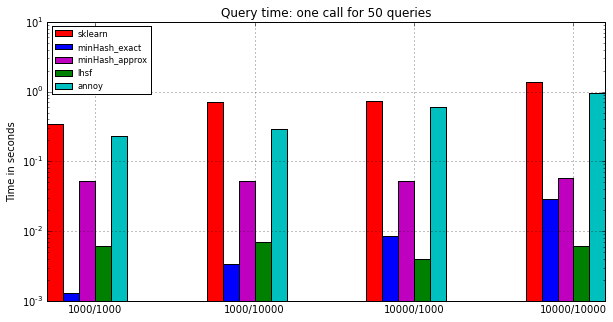

In [10]:
plotData(data=returnValues[7:13], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Query time: one call for 50 queries')

####Accuracy for different datasets

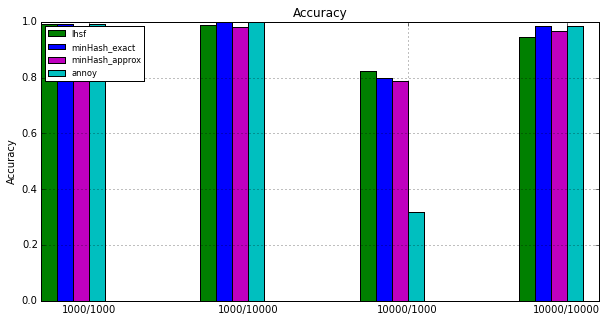

In [11]:
plotData(data=returnValues[13:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=xticks, ylabel="Accuracy", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Accuracy', log=False)

## Non-zero elements are fixed

For the dataset the following parameters are used:
- seed=5
- number_of_centroids=7,
- number_of_instances=[100]
- number_of_features=[int(1e3)]
- size_of_dataset=8
- non_zero_elements=10
- fraction_of_density=0.2
                 

In [12]:
number_of_instances = [100]
number_of_features = [int(1e3), int(1e4), int(1e5)]
dataset_array = []
for instances in number_of_instances:
    for features in number_of_features:
        dataset_fixed, y = create_dataset_fixed_nonzero(seed=5,
                   number_of_centroids=7,
                   number_of_instances=instances,
                   number_of_features=features,
                   size_of_dataset=8,
                   non_zero_elements=10,
                   fraction_of_density=0.2)
        dataset_array.append(dataset_fixed)
returnValuesNonZero = measure_performance(dataset_array, n_neighbors_sklearn, n_neighbors_minHash)


Desity: 0.01
Desity: 0.001
Desity: 0.0001
Dataset processing:  1 / 3
Fitting of sklearn_nneighbors done!
Fitting of minHash_nneighbors done!
Fitting of LSHF done!
Fitting of annoy done!
Computation of sklearn_nneighbors done!
Computation of minHash_slow done!
Computation of minHash_fast done!
Computation of lshf done!
Computation_2 of sklearn_nneighbors done!
Computation_2 of minHash_slow done!
Computation_2 of minHash_fast done!
Computation_2 of lshf done!
Computation_2 of annoy done!
Dataset processing:  2 / 3
Fitting of sklearn_nneighbors done!
Fitting of minHash_nneighbors done!
Fitting of LSHF done!
Fitting of annoy done!
Computation of sklearn_nneighbors done!
Computation of minHash_slow done!
Computation of minHash_fast done!
Computation of lshf done!
Computation_2 of sklearn_nneighbors done!
Computation_2 of minHash_slow done!
Computation_2 of minHash_fast done!
Computation_2 of lshf done!
Computation_2 of annoy done!
Dataset processing:  3 / 3
Fitting of sklearn_nneighbors don

####Query time: 50 calls for a single query

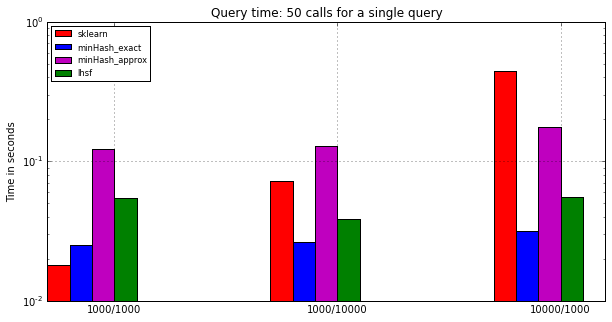

In [13]:
plotData(data=returnValuesNonZero[3:7], color=["r", "b", "m", "g"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Query time: 50 calls for a single query')

####Query time: one call for 50 queries

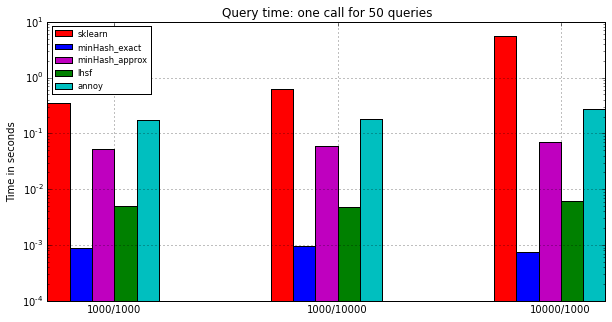

In [14]:
plotData(data=returnValuesNonZero[7:13], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Query time: one call for 50 queries')

####Accuracy for different datasets

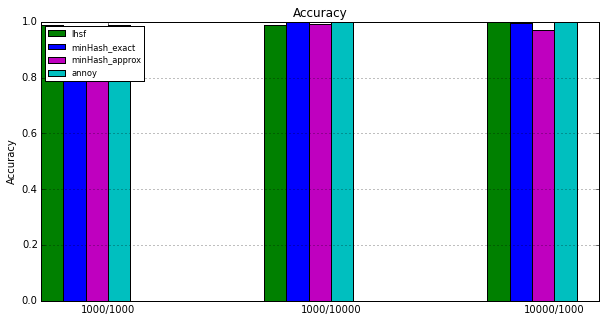

In [16]:
plotData(data=returnValuesNonZero[13:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=xticks, ylabel="Accuracy", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Accuracy', log=False)

##Bursi dataset

In [1]:
from eden.converter.graph.gspan import gspan_to_eden
from eden.graph import Vectorizer
graphs = gspan_to_eden( 'http://www.bioinf.uni-freiburg.de/~costa/bursi.gspan' )
vectorizer = Vectorizer( r=2,d=5 )
datasetBursi = vectorizer.transform( graphs )

In [ ]:
n_neighbors_sklearn = 5
n_neighbors_minHash = 5
returnValuesBursi = measure_performance([datasetBursi], n_neighbors_sklearn, n_neighbors_minHash, number_of_hashfunctions=800)

Dataset processing:  1 / 1
Fitting of sklearn_nneighbors done!
Fitting of minHash_nneighbors done!
Fitting of LSHF done!

####Query time: 50 calls for a single query

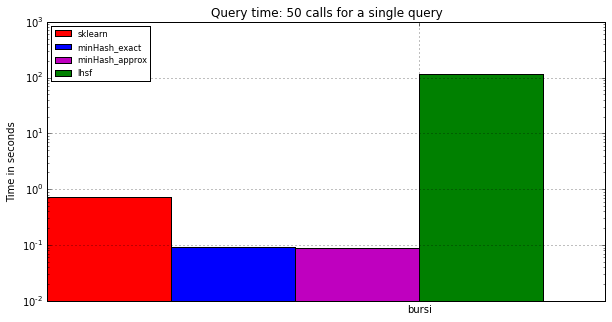

In [6]:
plotData(data=returnValuesBursi[3:7], color=["r", "b", "m", "g"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf"],
        xticks=["bursi"], ylabel="Time in seconds", number_of_instances=1,
        number_of_features=1, title='Query time: 50 calls for a single query')

####Query time: one call for 50 queries

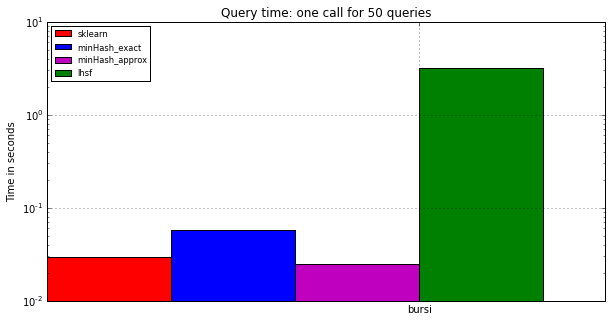

In [7]:
plotData(data=returnValuesBursi[7:13], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=["bursi"], ylabel="Time in seconds", number_of_instances=1,
        number_of_features=1, title='Query time: one call for 50 queries')

####Accuracy for different datasets

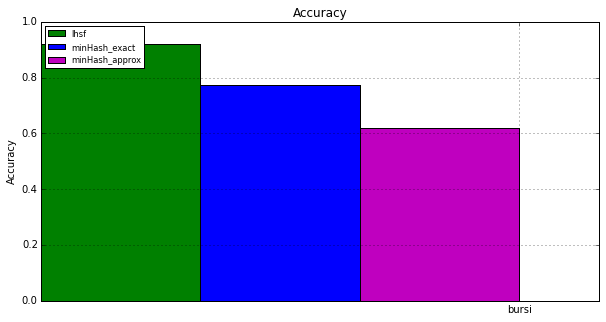

In [8]:
plotData(data=returnValuesBursi[11:], color=["g", "b", "m"], label=["lhsf", "minHash_exact", "minHash_approx"],
        xticks=["bursi"], ylabel="Accuracy", number_of_instances=1,
        number_of_features=1, title='Accuracy', log=False)

####Accuracy vs. number of hash functions

In [5]:
precision_minHash_exact = []
precision_minHash_approx = []
time_minHash_exact = []
time_minHash_approx = []
time_minHash_fit = []
size_of_query = 1000
query = None


if size_of_query < datasetBursi.shape[0]:
    query_ids = []
    for i in range(size_of_query):
        query_ids.append(random.randint(0, datasetBursi.shape[0]-1))
    query = datasetBursi[query_ids]
else:
    query = datasetBursi
nearest_neighbor_sklearn = NearestNeighbors(n_neighbors = 5)
nearest_neighbor_sklearn.fit(datasetBursi)
n_neighbors_sklearn = nearest_neighbor_sklearn.kneighbors(X=query,return_distance=False)

hash_functions_list = [50, 100, 200, 400, 800, 1000, 2000, 4000, 8000]
for hash_functions in hash_functions_list:    

    nearest_neighbor_minHash = kneighbors.MinHashNearestNeighbors(n_neighbors = 5,
                                                                  number_of_hash_functions=hash_functions,
                                                                  max_bin_size = 50, minimal_blocks_in_common = 1, 
                                                                  block_size = 4, excess_factor = 5,)

    time_start = time.time()
    nearest_neighbor_minHash.fit(datasetBursi)
    # print nearest_neighbor_minHash._inverseIndex._inverse_index
    time_end = time.time()
    time_minHash_fit.append(time_end - time_start)

    time_start = time.time()
    n_neighbors_minHash_exact = nearest_neighbor_minHash.kneighbors(X=query,return_distance=False)
    time_end = time.time()
    time_minHash_exact.append(time_end - time_start)


    time_start = time.time()
    n_neighbors_minHash_approx = nearest_neighbor_minHash.kneighbors(X=query,fast=True,return_distance=False)
    # print n_neighbors_minHash_approx_1_50
    time_end = time.time()
    time_minHash_approx.append(time_end - time_start)

    accuracy_minHash_exact = np.in1d(n_neighbors_minHash_exact, n_neighbors_sklearn).mean()
    accuracy_minHash_approx = np.in1d(n_neighbors_minHash_approx, n_neighbors_sklearn).mean()
    precision_minHash_exact.append(accuracy_minHash_exact)
    precision_minHash_approx.append(accuracy_minHash_approx)
   
xticksBursi = []
for i in hash_functions_list:
    xticksBursi.append(str(i))

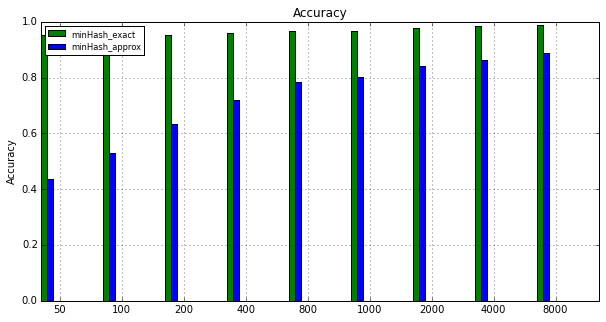

In [6]:
plotData(data=[precision_minHash_exact, precision_minHash_approx], color=["g", "b"], label=["minHash_exact", "minHash_approx"],
        xticks=xticksBursi, ylabel="Accuracy", number_of_instances=len(hash_functions_list),
        number_of_features=1, title='Accuracy', log=False)

####Test the fitting time of single-core vs. multi-core for different number of hash functions
As a dataset "bursi" is used.

In [19]:
import multiprocessing as mp
time_fit = []
time_fit_single_core = []
hash_functions_list = [100, 400, 600, 800, 1000]
for hash_functions in hash_functions_list:    

    nearest_neighbor_minHash = kneighbors.MinHashNearestNeighbors(number_of_hash_functions=hash_functions, number_of_cores = mp.cpu_count())
    nearest_neighbor_minHash_single_core = kneighbors.MinHashNearestNeighbors(number_of_hash_functions=hash_functions, number_of_cores=1)

    time_start = time.time()
    nearest_neighbor_minHash.fit(datasetBursi)
    time_end = time.time()
    time_fit.append(time_end - time_start)
    
    time_start = time.time()
    nearest_neighbor_minHash_single_core.fit(datasetBursi)
    time_end = time.time()
    time_fit_single_core.append(time_end - time_start)

xticksBursi = []
for i in hash_functions_list:
    xticksBursi.append(str(i))

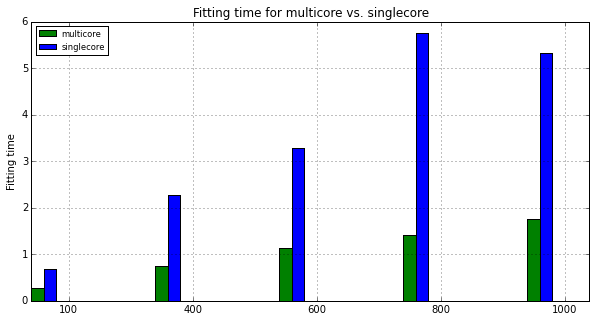

In [18]:
plotData(data=[time_fit, time_fit_single_core], color=["g", "b"], label=["multicore", "singlecore"],
        xticks=xticksBursi, ylabel="Fitting time", number_of_instances=len(hash_functions_list),
        number_of_features=1, title='Fitting time for multicore vs. singlecore', log=False)

####Test the fitting time of single-core vs. multi-core for datasets with different number of instances

In [23]:
import multiprocessing as mp

time_fit = []
time_fit_single_core = []
instances = [100,1000,10000, 100000, 1000000, 10000000]

for instances_ in instances:    
    X, _ = create_dataset(seed=1,
                   number_of_centroids=7,
                   number_of_instances=instances_,
                   number_of_features=100,
                   size_of_dataset=8,
                   density=0.00001,
                   fraction_of_density=0.2
                   )
    nearest_neighbor_minHash = kneighbors.MinHashNearestNeighbors(number_of_cores = mp.cpu_count())
    nearest_neighbor_minHash_single_core = kneighbors.MinHashNearestNeighbors(number_of_cores=1)

    time_start = time.time()
    nearest_neighbor_minHash.fit(X)
    time_end = time.time()
    time_fit.append(time_end - time_start)
    
    time_start = time.time()
    nearest_neighbor_minHash_single_core.fit(X)
    time_end = time.time()
    time_fit_single_core.append(time_end - time_start)
xticksBursi = []
for i in instances:
    xticksBursi.append(str(i))


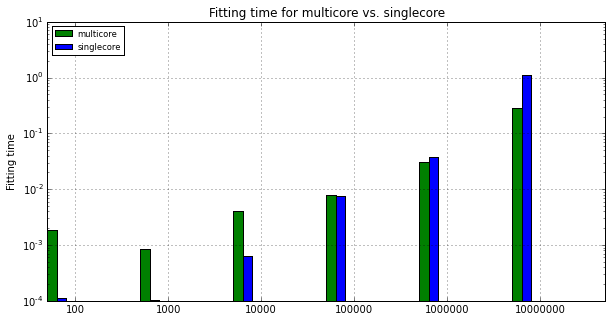

In [24]:
plotData(data=[time_fit, time_fit_single_core], color=["g", "b"], label=["multicore", "singlecore"],
        xticks=xticksBursi, ylabel="Fitting time", number_of_instances=len(instances),
        number_of_features=1, title='Fitting time for multicore vs. singlecore', log=True)